In [ ]:
!pip install ipython-autotime

%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00
time: 505 µs (started: 2024-03-04 05:02:48 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

time: 3.73 s (started: 2024-03-04 05:02:48 +00:00)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Covid Dataset.csv to Covid Dataset.csv
time: 11.6 s (started: 2024-03-04 05:02:52 +00:00)


In [ ]:
data = pd.read_csv('Covid Dataset.csv')
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


time: 120 ms (started: 2024-03-04 05:03:04 +00:00)


In [ ]:
data.shape

(5434, 21)

time: 11.9 ms (started: 2024-03-04 05:03:04 +00:00)


In [ ]:
cols_to_drop = ['Gastrointestinal ','Asthma','Heart Disease','Diabetes','Chronic Lung Disease']

data = data.drop(columns=cols_to_drop,axis=1)

time: 13.5 ms (started: 2024-03-04 05:03:04 +00:00)


<ipython-input-7-bb61b46a6fbb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = target_group['COVID-19'],y = target_group[0],palette=np.array(pal[::-1])[rank] )
<ipython-input-7-bb61b46a6fbb>:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  g = sns.barplot(x = target_group['COVID-19'],y = target_group[0],palette=np.array(pal[::-1])[rank] )


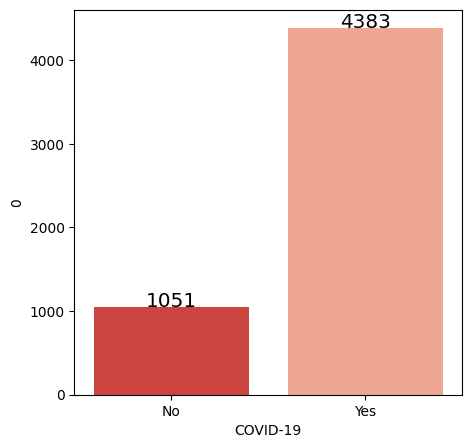

time: 633 ms (started: 2024-03-04 05:03:04 +00:00)


In [ ]:
plt.figure(figsize=(5,5))
target_group = data.groupby('COVID-19').size().reset_index()
pal = sns.color_palette("Reds", len(target_group))
rank = target_group['COVID-19'].argsort().argsort()
g = sns.barplot(x = target_group['COVID-19'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['COVID-19'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

In [ ]:
'''
data = data.drop('time', axis = 1)
data.head()
'''

"\ndata = data.drop('time', axis = 1)\ndata.head()\n"

time: 11.9 ms (started: 2024-03-04 05:03:05 +00:00)


In [ ]:
data.dtypes

Breathing Problem                          object
Fever                                      object
Dry Cough                                  object
Sore throat                                object
Running Nose                               object
Headache                                   object
Hyper Tension                              object
Fatigue                                    object
Abroad travel                              object
Contact with COVID Patient                 object
Attended Large Gathering                   object
Visited Public Exposed Places              object
Family working in Public Exposed Places    object
Wearing Masks                              object
Sanitization from Market                   object
COVID-19                                   object
dtype: object

time: 13.3 ms (started: 2024-03-04 05:03:05 +00:00)


In [ ]:
categorical_cols = data.drop('COVID-19',axis=1).columns

# Perform one-hot encoding on categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Display the encoded DataFrame
print(data_encoded.head())

label_encoder = LabelEncoder()
y_data_encoded =  label_encoder.fit_transform(data['COVID-19'])

  COVID-19  Breathing Problem_No  Breathing Problem_Yes  Fever_No  Fever_Yes  \
0      Yes                     0                      1         0          1   
1      Yes                     0                      1         0          1   
2      Yes                     0                      1         0          1   
3      Yes                     0                      1         0          1   
4      Yes                     0                      1         0          1   

   Dry Cough_No  Dry Cough_Yes  Sore throat_No  Sore throat_Yes  \
0             0              1               0                1   
1             0              1               0                1   
2             0              1               0                1   
3             0              1               1                0   
4             0              1               0                1   

   Running Nose_No  ...  Contact with COVID Patient_No  \
0                0  ...                              0   


#SMOTE sampling (RF, SVM, DNN)

In [ ]:
X = data_encoded.drop(columns=['COVID-19'],axis=1)
y = y_data_encoded

scler = StandardScaler() #method for standardizing features by removing the mean and scaling to unit variance.
X_scaled = scler.fit_transform(X) #standardize the features in the X df, fits the scler to the data (calculates mean and SD), then transforms the data using the calculated mean and standard deviation to achieve standardization

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE

# Specify the desired ratio after resampling
# For example, if you want the minority class to have twice as many samples as the majority class:
desired_ratio = 0.5  # ratio of minority to majority class

# Initialize SMOTE with the desired ratio
smoteAlg = SMOTE(sampling_strategy=desired_ratio, random_state=42)

# Apply SMOTE to the training data to balance the classes
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)


#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_bal).value_counts())



Class distribution after SMOTE:
0    3499
1    3499
dtype: int64
time: 565 ms (started: 2024-03-04 05:03:05 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy rf:", accuracy_rf)

pd.DataFrame(precision_recall)

Accuracy rf: 0.9751609935602575


,0,1,accuracy,macro avg,weighted avg
precision,0.882609,1.000000,0.975161,0.941304,0.978077
recall,1.000000,0.969457,0.975161,0.984729,0.975161
f1-score,0.937644,0.984492,0.975161,0.961068,0.975743
support,203.000000,884.000000,0.975161,1087.000000,1087.000000


time: 988 ms (started: 2024-03-04 05:03:05 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_bal, y_train_bal)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm)
print("\nClassification Report:\n", report)

Accuracy: 0.9457221711131555

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87       203
           1       1.00      0.94      0.97       884

    accuracy                           0.95      1087
   macro avg       0.89      0.96      0.92      1087
weighted avg       0.96      0.95      0.95      1087

time: 1.06 s (started: 2024-03-04 05:03:06 +00:00)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



smoteAlg = SMOTE(random_state=42, k_neighbors=1)
X_train_bal, y_train_bal = smoteAlg.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = smoteAlg.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(28,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
136/136 [==============================] - 4s 10ms/step - loss: 0.2128 - accuracy: 0.9142 - val_loss: 0.0937 - val_accuracy: 0.9563
Epoch 2/10
136/136 [==============================] - 1s 6ms/step - loss: 0.0614 - accuracy: 0.9765 - val_loss: 0.0851 - val_accuracy: 0.9609
Epoch 3/10
136/136 [==============================] - 1s 6ms/step - loss: 0.0481 - accuracy: 0.9791 - val_loss: 0.0617 - val_accuracy: 0.9747
Epoch 4/10
136/136 [==============================] - 1s 8ms/step - loss: 0.0429 - accuracy: 0.9795 - val_loss: 0.0529 - val_accuracy: 0.9862
Epoch 5/10
136/136 [==============================] - 1s 6ms/step - loss: 0.0422 - accuracy: 0.9788 - val_loss: 0.0465 - val_accuracy: 0.9862
Epoch 6/10
136/136 [==============================] - 1s 5ms/step - loss: 0.0397 - accuracy: 0.9802 - val_loss: 0.0494 - val_accuracy: 0.9851
Epoch 7/10
136/136 [==============================] - 1s 10ms/step - loss: 0.0405 - accuracy: 0.9788 - val_loss: 0.0443 - val_accuracy: 0.9862
Epoc

#ADASYN Sampling (RF, SVM, DNN)

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the class distribution after applying ADASYN
print("Class distribution before ADASYN:")
print(pd.Series(y_train).value_counts())

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Check the class distribution after applying ADASYN
print("Class distribution after ADASYN:")
print(pd.Series(y_train_resampled).value_counts())


Class distribution before ADASYN:
1    3499
0     848
dtype: int64
Class distribution after ADASYN:
1    3499
0    3472
dtype: int64
time: 134 ms (started: 2024-03-04 05:03:33 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_adasyn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_adasyn)

pd.DataFrame(precision_recall)

Accuracy: 0.9751609935602575


,0,1,accuracy,macro avg,weighted avg
precision,0.882609,1.000000,0.975161,0.941304,0.978077
recall,1.000000,0.969457,0.975161,0.984729,0.975161
f1-score,0.937644,0.984492,0.975161,0.961068,0.975743
support,203.000000,884.000000,0.975161,1087.000000,1087.000000


time: 1.15 s (started: 2024-03-04 05:03:33 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_adasyn = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_adasyn)
print("\nClassification Report:\n", report)

Accuracy: 0.922723091076357

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.98      0.83       203
           1       1.00      0.91      0.95       884

    accuracy                           0.92      1087
   macro avg       0.85      0.94      0.89      1087
weighted avg       0.94      0.92      0.93      1087

time: 2.75 s (started: 2024-03-04 05:03:34 +00:00)


In [ ]:


#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

adasyn = ADASYN(random_state=42, sampling_strategy=1.0)
X_train_bal, y_train_bal = adasyn.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = adasyn.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(28,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_adasyn = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
136/136 [==============================] - 1s 4ms/step - loss: 0.2251 - accuracy: 0.9015 - val_loss: 0.2220 - val_accuracy: 0.8604
Epoch 2/10
136/136 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 0.9740 - val_loss: 0.1239 - val_accuracy: 0.9677
Epoch 3/10
136/136 [==============================] - 0s 2ms/step - loss: 0.0466 - accuracy: 0.9791 - val_loss: 0.1441 - val_accuracy: 0.9262
Epoch 4/10
136/136 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9784 - val_loss: 0.1257 - val_accuracy: 0.9285
Epoch 5/10
136/136 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9795 - val_loss: 0.0819 - val_accuracy: 0.9850
Epoch 6/10
136/136 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9807 - val_loss: 0.1353 - val_accuracy: 0.9146
Epoch 7/10
136/136 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9781 - val_loss: 0.0967 - val_accuracy: 0.9562
Epoch 

#Random Oversampling (RF, SVM, DNN)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd


ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random Oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random Oversampling:
0    3499
1    3499
dtype: int64
time: 16.5 ms (started: 2024-03-04 05:03:44 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_ros = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_ros)

pd.DataFrame(precision_recall)

Accuracy: 0.9742647058823529


,0,1,accuracy,macro avg,weighted avg
precision,0.871560,1.000000,0.974265,0.935780,0.977570
recall,1.000000,0.968820,0.974265,0.984410,0.974265
f1-score,0.931373,0.984163,0.974265,0.957768,0.974944
support,95.000000,449.000000,0.974265,544.000000,544.000000


time: 402 ms (started: 2024-03-04 05:03:44 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_ros = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_ros)
print("\nClassification Report:\n", report)

Accuracy: 0.9448529411764706

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86        95
           1       1.00      0.94      0.97       449

    accuracy                           0.94       544
   macro avg       0.88      0.96      0.91       544
weighted avg       0.96      0.94      0.95       544

time: 576 ms (started: 2024-03-04 05:03:44 +00:00)


In [ ]:

#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Apply ros to balance the training set
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = ros.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(28,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_ros = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
136/136 [==============================] - 1s 4ms/step - loss: 0.1608 - accuracy: 0.9462 - val_loss: 0.1029 - val_accuracy: 0.9448
Epoch 2/10
136/136 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9765 - val_loss: 0.0770 - val_accuracy: 0.9644
Epoch 3/10
136/136 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9777 - val_loss: 0.0546 - val_accuracy: 0.9770
Epoch 4/10
136/136 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9798 - val_loss: 0.0575 - val_accuracy: 0.9747
Epoch 5/10
136/136 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9784 - val_loss: 0.0611 - val_accuracy: 0.9678
Epoch 6/10
136/136 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9798 - val_loss: 0.0451 - val_accuracy: 0.9805
Epoch 7/10
136/136 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9786 - val_loss: 0.0703 - val_accuracy: 0.9437
Epoch 

#Random Under Sampling (RF, SVM, DNN)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after Random undersampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Random undersampling:
0    848
1    848
dtype: int64
time: 8.96 ms (started: 2024-03-04 05:03:51 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_rus = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_rus)

pd.DataFrame(precision_recall)

Accuracy: 0.9742647058823529


,0,1,accuracy,macro avg,weighted avg
precision,0.871560,1.000000,0.974265,0.935780,0.977570
recall,1.000000,0.968820,0.974265,0.984410,0.974265
f1-score,0.931373,0.984163,0.974265,0.957768,0.974944
support,95.000000,449.000000,0.974265,544.000000,544.000000


time: 246 ms (started: 2024-03-04 05:03:51 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_rus = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_rus)
print("\nClassification Report:\n", report)

Accuracy: 0.9448529411764706

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        95
           1       0.99      0.95      0.97       449

    accuracy                           0.94       544
   macro avg       0.89      0.94      0.91       544
weighted avg       0.95      0.94      0.95       544

time: 67.9 ms (started: 2024-03-04 05:03:51 +00:00)


In [ ]:

#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



# Apply rus to balance the training set
rus = RandomUnderSampler(random_state=42)
X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)

X_val_bal, y_val_bal = rus.fit_resample(X_val, y_val)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(28,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_rus = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
136/136 [==============================] - 1s 4ms/step - loss: 0.1829 - accuracy: 0.9397 - val_loss: 0.1099 - val_accuracy: 0.9583
Epoch 2/10
136/136 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9761 - val_loss: 0.0796 - val_accuracy: 0.9815
Epoch 3/10
136/136 [==============================] - 1s 5ms/step - loss: 0.0485 - accuracy: 0.9791 - val_loss: 0.0658 - val_accuracy: 0.9815
Epoch 4/10
136/136 [==============================] - 1s 4ms/step - loss: 0.0447 - accuracy: 0.9788 - val_loss: 0.0753 - val_accuracy: 0.9630
Epoch 5/10
136/136 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9781 - val_loss: 0.0554 - val_accuracy: 0.9815
Epoch 6/10
136/136 [==============================] - 1s 4ms/step - loss: 0.0405 - accuracy: 0.9793 - val_loss: 0.0579 - val_accuracy: 0.9815
Epoch 7/10
136/136 [==============================] - 1s 5ms/step - loss: 0.0394 - accuracy: 0.9795 - val_loss: 0.0641 - val_accuracy: 0.9722
Epoch 

#GAMMA Distribution Sampling (RF, SVM, DNN)

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.utils import shuffle
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target vector

# Separate minority and majority classes
X_minority = X_scaled[y == 1]
X_majority = X_scaled[y == 0]

# Determine the size of the minority class
minority_size = len(X_minority)

# Define parameters for the Gamma distribution
shape = 2.0  # Shape parameter of the Gamma distribution
scale = 1.0  # Scale parameter of the Gamma distribution

# Generate random indices for sampling from the majority class
#gamma_indices = pd.random.gamma(shape, scale, size=minority_size).astype(int)

gamma_indices = np.round(np.random.gamma(shape, scale, size=minority_size)).astype(int)

# Sample from the majority class using the Gamma indices
#X_majority_sampled = X_majority.iloc[gamma_indices]
X_majority_sampled = X_majority[gamma_indices]

# Combine minority class samples with sampled majority class samples
X_resampled = np.concatenate([X_minority, X_majority_sampled])
y_resampled = np.concatenate([pd.Series(np.ones(minority_size)), pd.Series(np.zeros(minority_size))])

# Shuffle the resampled data
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Check the class distribution after resampling
print("Class distribution after Gamma distribution-based sampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after Gamma distribution-based sampling:
0.0    4383
1.0    4383
dtype: int64
time: 13.9 ms (started: 2024-03-04 05:03:58 +00:00)


In [ ]:
# Training the classifier
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_resampled, y_resampled)

# Predictions
y_pred = clf_balanced.predict(X_test)

# Step 4: Record precision and recall
precision_recall = classification_report(y_test, y_pred, output_dict=True)

accuracy_rf_gamma = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf_gamma)

pd.DataFrame(precision_recall)

Accuracy: 0.8639705882352942


,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.858509,0.863971,0.929254,0.883218
recall,0.221053,1.000000,0.863971,0.610526,0.863971
f1-score,0.362069,0.923868,0.863971,0.642969,0.825760
support,95.000000,449.000000,0.863971,544.000000,544.000000


time: 389 ms (started: 2024-03-04 05:03:58 +00:00)


In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_svm_gamma = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_svm_gamma)
print("\nClassification Report:\n", report)

Accuracy: 0.8970588235294118

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.41      0.58        95
           1       0.89      1.00      0.94       449

    accuracy                           0.90       544
   macro avg       0.94      0.71      0.76       544
weighted avg       0.91      0.90      0.88       544

time: 33.2 ms (started: 2024-03-04 05:03:58 +00:00)


In [ ]:

#Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(28,)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

'''
print(X_train.shape)
print(model.input_shape)
'''

# Train the model
history = model.fit(X_train,y_train, epochs=10, batch_size=32, validation_data=(X_val_bal, y_val_bal))

# Evaluate the model on the test set
loss, accuracy_dnn_gamma = model.evaluate(X_test, y_test)

# Make predictions
y_pred = model.predict(X_test)

Epoch 1/10
220/220 [==============================] - 1s 3ms/step - loss: 0.0485 - accuracy: 0.9940 - val_loss: 1.2425 - val_accuracy: 0.6620
Epoch 2/10
220/220 [==============================] - 0s 2ms/step - loss: 7.0113e-04 - accuracy: 1.0000 - val_loss: 1.5286 - val_accuracy: 0.6620
Epoch 3/10
220/220 [==============================] - 0s 2ms/step - loss: 2.2954e-04 - accuracy: 1.0000 - val_loss: 1.6935 - val_accuracy: 0.6620
Epoch 4/10
220/220 [==============================] - 0s 2ms/step - loss: 1.1292e-04 - accuracy: 1.0000 - val_loss: 1.8208 - val_accuracy: 0.6620
Epoch 5/10
220/220 [==============================] - 1s 2ms/step - loss: 6.6402e-05 - accuracy: 1.0000 - val_loss: 1.9140 - val_accuracy: 0.6620
Epoch 6/10
220/220 [==============================] - 1s 2ms/step - loss: 4.3148e-05 - accuracy: 1.0000 - val_loss: 1.9942 - val_accuracy: 0.6620
Epoch 7/10
220/220 [==============================] - 1s 2ms/step - loss: 2.9969e-05 - accuracy: 1.0000 - val_loss: 2.0664 - val

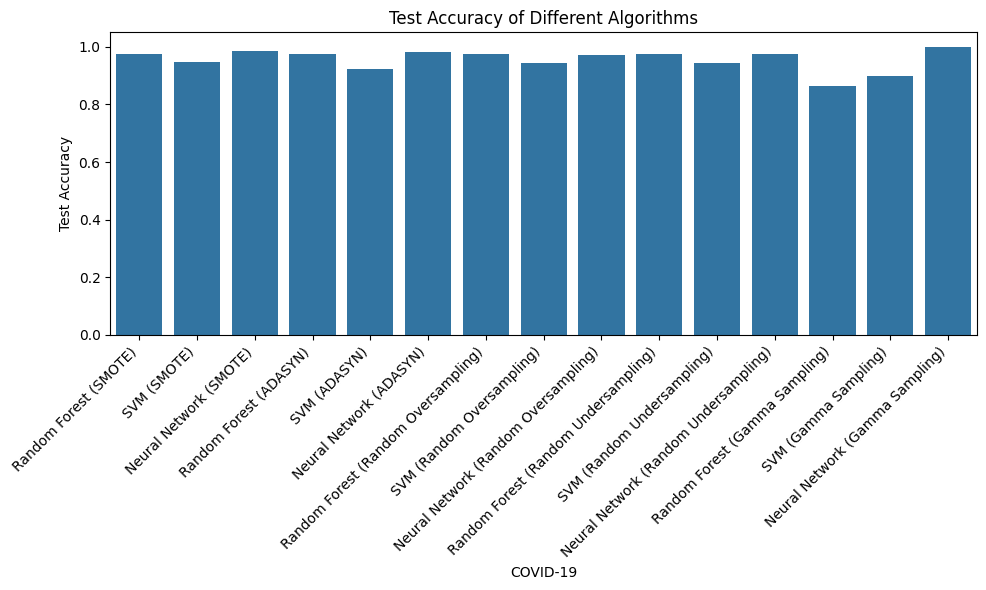

time: 470 ms (started: 2024-03-04 05:04:05 +00:00)


In [ ]:
# Store the test accuracies for each algorithm
# Adjusted dictionary to match your variables
test_accuracies = {
    'Random Forest (SMOTE)': accuracy_rf,
    'SVM (SMOTE)': accuracy_svm,
    'Neural Network (SMOTE)': accuracy_dnn,
    'Random Forest (ADASYN)': accuracy_rf_adasyn,
    'SVM (ADASYN)': accuracy_svm_adasyn,
    'Neural Network (ADASYN)': accuracy_dnn_adasyn,
    'Random Forest (Random Oversampling)': accuracy_rf_ros,
    'SVM (Random Oversampling)': accuracy_svm_ros,
    'Neural Network (Random Oversampling)': accuracy_dnn_ros,
    'Random Forest (Random Undersampling)': accuracy_rf_rus,
    'SVM (Random Undersampling)': accuracy_svm_rus,
    'Neural Network (Random Undersampling)': accuracy_dnn_rus,
    'Random Forest (Gamma Sampling)': accuracy_rf_gamma,
    'SVM (Gamma Sampling)': accuracy_svm_gamma,
    'Neural Network (Gamma Sampling)': accuracy_dnn_gamma,
}


# Plotting the test accuracy for each algorithm
plt.figure(figsize=(10, 6))
sns.barplot(x=list(test_accuracies.keys()), y=list(test_accuracies.values()))
plt.xticks(rotation=45, ha='right')
plt.title('Test Accuracy of Different Algorithms')
plt.xlabel('COVID-19')
plt.ylabel('Test Accuracy')
plt.tight_layout()
plt.show()

#End of Analysis

In [ ]:
SMOTE_mean = (accuracy_svm + accuracy_rf + accuracy_dnn)/3 *100
print("SMOTE avg : ", SMOTE_mean)

adasyn_mean = (accuracy_svm_adasyn + accuracy_rf_adasyn + accuracy_dnn_adasyn)/3 *100
print("adasyn avg : ", adasyn_mean)

ros_mean = (accuracy_svm_ros + accuracy_rf_ros + accuracy_dnn_ros)/3 * 100
print("ros avg : ", ros_mean)

rus_mean = (accuracy_svm_rus + accuracy_rf_rus + accuracy_dnn_rus)/3 * 100
print("rus avg : ", rus_mean)

gamma_mean = (accuracy_svm_gamma + accuracy_rf_gamma + accuracy_dnn_gamma)/3 * 100
print("gamma avg : ", gamma_mean)

SMOTE avg :  96.87257560986166
adasyn avg :  96.04466603380594
ros avg :  96.38480403844048
rus avg :  96.50735317492017
gamma avg :  92.03431372549021
time: 2.18 ms (started: 2024-03-04 05:04:05 +00:00)
